<a href="https://colab.research.google.com/github/aathira55/DL-for-computer-vision/blob/main/DL_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [6]:
os.chdir('/content/drive/MyDrive/fdp')

In [9]:
#present working directory

In [10]:
import tensorflow as tf

In [11]:
mnist_data=tf.keras.datasets.mnist

In [13]:
(X_train,Y_train),(X_test,Y_test)= mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
Y_train.shape

(60000,)

In [17]:
X_test.shape

(10000, 28, 28)

In [26]:
Y_train[2]

4

In [20]:
import matplotlib.pyplot as plt

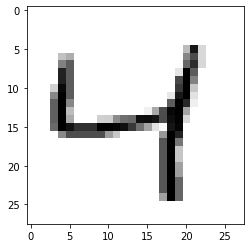

In [27]:
plt.imshow(X_train[2], cmap="binary")


In [29]:
import seaborn as sns

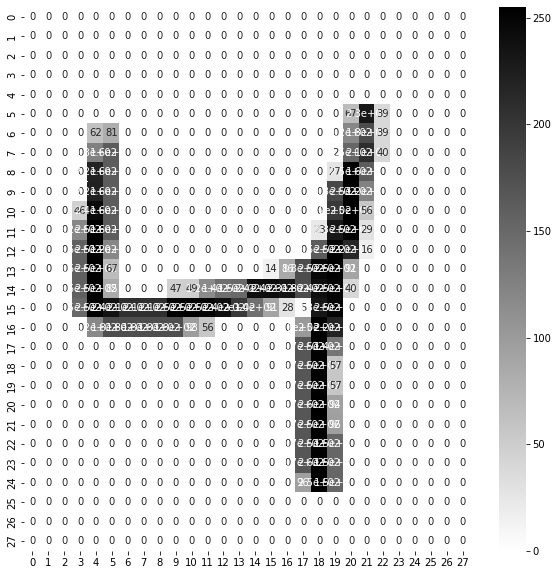

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[2],annot=True,cmap='binary')

In [34]:
X_train= X_train/255.
x_test=X_test/255.

In [36]:
X_valid,X_train=X_train[:5000],X_train[5000:]
Y_valid,Y_train=Y_train[:5000],Y_train[5000:]

In [37]:
X_valid.shape

(5000, 28, 28)

In [38]:
X_train.shape

(50000, 28, 28)

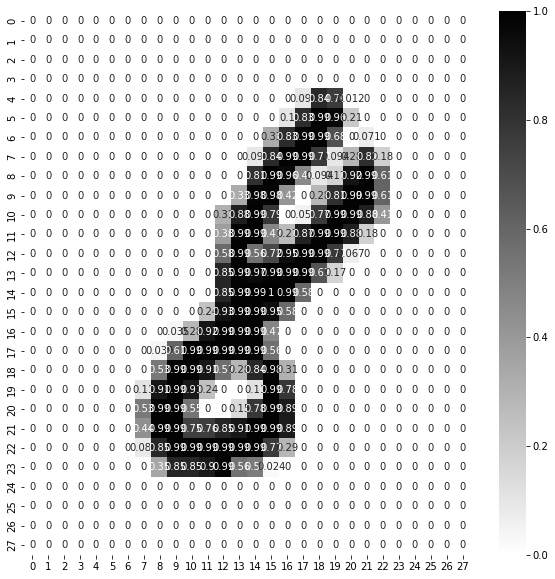

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[1],annot=True,cmap='binary')

In [44]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="input layer"),tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),tf.keras.layers.Dense(10,activation='softmax',name='output layer')]